In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
df=pd.read_csv(r"C:\Users\devel\Downloads\machine_learning\PROJECT ON GIT\car_price_predictor_mine\quikr_car.csv")
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [3]:
df1=df.copy()

In [4]:
#checking shape
df.shape

(892, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [7]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [8]:
for i in range(6):
    print(df.iloc[:,i:i+1].value_counts())

name                                
Honda City                              13
Honda Amaze                             11
Maruti Suzuki Dzire                     10
Maruti Suzuki Alto 800 Lxi               9
Mahindra Scorpio S10                     9
                                        ..
Maruti Suzuki Wagon R Select Variant     1
Maruti Suzuki Zen Estilo                 1
Maruti Suzuki Zen LX BSII                1
Maruti Suzuki Zen VX                     1
2012 Tata Sumo Gold f                    1
Length: 525, dtype: int64
company   
Maruti        235
Hyundai       145
Mahindra      100
Tata           74
Honda          61
Toyota         39
Chevrolet      35
Renault        34
Ford           31
Volkswagen     20
Skoda          13
Audi           11
Mini            8
Datsun          8
BMW             8
Mitsubishi      6
Mercedes        6
Nissan          6
Commercial      6
Force           4
Fiat            4
Hindustan       3
I               3
tata            3
Sale            2
urg

# data quality checking

### null values
- kms_driven    52
- fuel_type     55
### change it into int
- year        892 non-null    object
- Price       892 non-null    object
- kms_driven  840 non-null    object
### problem in columns
- price column has ask for price value
- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- kms_driven with kms at last.
- It has nan values and two rows have 'Petrol' in them







# cleaning data and feature engineering
- 

# price column

In [9]:
df["Price"].value_counts()

Ask For Price    35
2,50,000         17
3,50,000         14
1,80,000         13
1,30,000         12
                 ..
1,89,000          1
4,01,000          1
1,78,000          1
3,11,000          1
1,68,000          1
Name: Price, Length: 274, dtype: int64

In [10]:
df=df[df["Price"]!="Ask For Price"]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        857 non-null    object
 1   company     857 non-null    object
 2   year        857 non-null    object
 3   Price       857 non-null    object
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: object(6)
memory usage: 46.9+ KB


In [12]:
df['Price']=df['Price'].str.replace(',','').astype(int)


<ipython-input-12-6c07cc7499ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].str.replace(',','').astype(int)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        857 non-null    object
 1   company     857 non-null    object
 2   year        857 non-null    object
 3   Price       857 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(1), object(5)
memory usage: 43.5+ KB


### name column

In [14]:
df["name"].value_counts()

Honda City                                 13
Honda Amaze                                11
Maruti Suzuki Dzire                        10
Mahindra Scorpio S10                        9
Maruti Suzuki Swift Dzire VXi 1.2 BS IV     7
                                           ..
Datsun GO T O                               1
Datsun Redi GO T O                          1
Honda City 1.5 V AT                         1
Hyundai i20 Active 1.4L SX O                1
Hyundai Elantra 1.8 S                       1
Name: name, Length: 503, dtype: int64

In [15]:
df["name"].isnull().sum()

0

In [16]:
df["name"]=df["name"].str.split().str[0:2].str.join("")

<ipython-input-16-b337c8fb71cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["name"]=df["name"].str.split().str[0:2].str.join("")


In [17]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,HyundaiSantro,Hyundai,2007,80000,"45,000 kms",Petrol
1,MahindraJeep,Mahindra,2006,425000,40 kms,Diesel
3,HyundaiGrand,Hyundai,2014,325000,"28,000 kms",Petrol
4,FordEcoSport,Ford,2014,575000,"36,000 kms",Diesel
6,FordFigo,Ford,2012,175000,"41,000 kms",Diesel


### year column

In [18]:
df["year"].value_counts()

2015    111
2014     94
2013     94
2012     75
2016     74
2011     59
2009     55
2017     53
2010     43
2018     30
2006     22
2007     19
2019     18
2008     16
2003     13
2005     13
2004     12
2000      7
2001      5
2002      4
sale      3
o...      3
Zest      2
d...      2
car       2
1995      2
n...      1
tion      1
sell      1
Sumo      1
r 15      1
ara)      1
2 bs      1
SALE      1
ture      1
arry      1
emi       1
e...      1
150k      1
SELL      1
cab       1
r...      1
o c4      1
able      1
zest      1
d Ex      1
go .      1
odel      1
k...      1
zire      1
TOUR      1
EV2       1
Name: year, dtype: int64

In [19]:
#removing other than int type data

df=df.iloc[np.where(df["year"].str.isnumeric())]

In [20]:
df["year"]=df["year"].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [22]:
df["year"].value_counts()

2015    111
2014     94
2013     94
2012     75
2016     74
2011     59
2009     55
2017     53
2010     43
2018     30
2006     22
2007     19
2019     18
2008     16
2005     13
2003     13
2004     12
2000      7
2001      5
2002      4
1995      2
Name: year, dtype: int64

# kms_driven

In [23]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,HyundaiSantro,Hyundai,2007,80000,"45,000 kms",Petrol
1,MahindraJeep,Mahindra,2006,425000,40 kms,Diesel
3,HyundaiGrand,Hyundai,2014,325000,"28,000 kms",Petrol
4,FordEcoSport,Ford,2014,575000,"36,000 kms",Diesel
6,FordFigo,Ford,2012,175000,"41,000 kms",Diesel


In [24]:
df["kms_driven"]=df["kms_driven"].str.split(",").str.join("").str.split(" ").str[0]
df[["kms_driven"]]

,kms_driven
0,45000
1,40
3,28000
4,36000
6,41000
...,...
886,132000
888,27000
889,40000
890,Petrol


In [25]:
df=df.iloc[np.where(df["kms_driven"].str.isnumeric())]
df["kms_driven"]=df["kms_driven"].astype(int)



In [26]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     1
dtype: int64

C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count       817.000000
mean      46250.714810
std       34283.745254
min           0.000000
25%       27000.000000
50%       41000.000000
75%       56758.000000
max      400000.000000
Name: kms_driven, dtype: float64

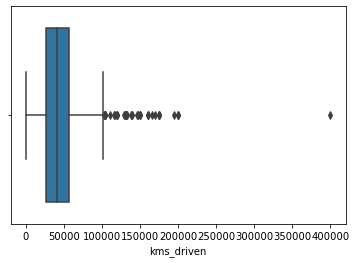

In [27]:
sns.boxplot(df["kms_driven"])
df["kms_driven"].describe()

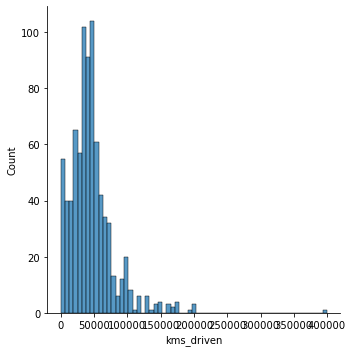

In [28]:
sns.displot(df["kms_driven"])

(array([ 67.,  56.,  59.,  75., 124., 130.,  91.,  55.,  47.,  20.,  17.,
         14.,  21.,   7.,   2.,   4.,   6.,   3.,   5.,   0.,   4.,   5.,
          0.,   0.,   1.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([     0.,   8000.,  16000.,  24000.,  32000.,  40000.,  48000.,
         56000.,  64000.,  72000.,  80000.,  88000.,  96000., 104000.,
        112000., 120000., 128000., 136000., 144000., 152000., 160000.,
        168000., 176000., 184000., 192000., 200000., 208000., 216000.,
        224000., 232000., 240000., 248000., 256000., 264000., 272000.,
        280000., 288000., 296000., 304000., 312000., 320000., 328000.,
        336000., 344000., 352000., 360000., 368000., 376000., 384000.,
        392000., 400000.]),
 <BarContainer object of 50 artists>)

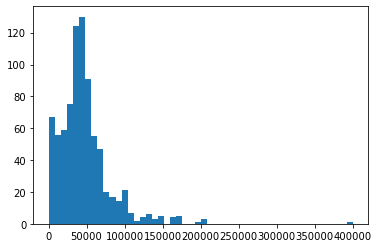

In [29]:
plt.hist(df["kms_driven"],bins=50)

In [30]:
df=df.reset_index(drop=True)
df2=df.copy()
df2

,name,company,year,Price,kms_driven,fuel_type
0,HyundaiSantro,Hyundai,2007,80000,45000,Petrol
1,MahindraJeep,Mahindra,2006,425000,40,Diesel
2,HyundaiGrand,Hyundai,2014,325000,28000,Petrol
3,FordEcoSport,Ford,2014,575000,36000,Diesel
4,FordFigo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
812,MarutiSuzuki,Maruti,2011,270000,50000,Petrol
813,TataIndica,Tata,2009,110000,30000,Diesel
814,ToyotaCorolla,Toyota,2009,300000,132000,Petrol
815,TataZest,Tata,2018,260000,27000,Diesel


# six columns

# doing EDA

C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Petrol    428
Diesel    386
LPG         2
Name: fuel_type, dtype: int64

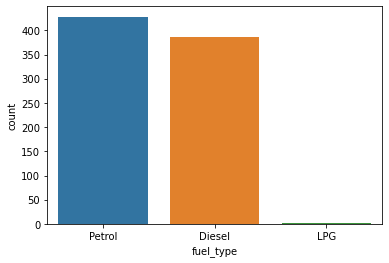

In [31]:
sns.countplot(df["fuel_type"])

df["fuel_type"].value_counts()

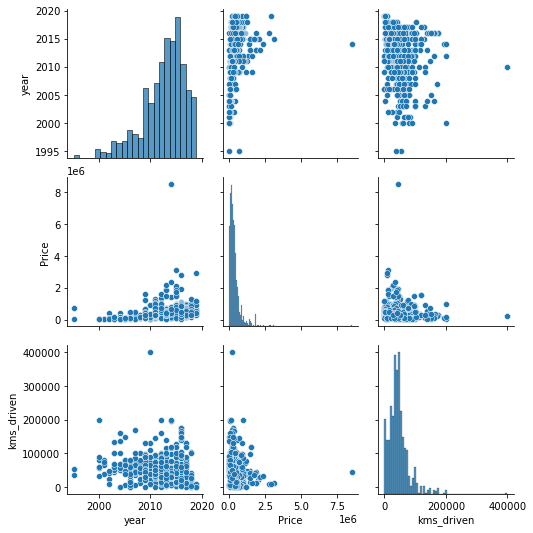

In [32]:
sns.pairplot(df)

In [33]:

df=df.dropna()
df.info()
df.to_csv("cleaned.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 816
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


# train and test spilt dataset

In [34]:
x=df[["name","company","year","kms_driven","fuel_type"]]
y=df[["Price"]]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
 X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)


In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 449 to 102
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        652 non-null    object
 1   company     652 non-null    object
 2   year        652 non-null    int32 
 3   kms_driven  652 non-null    int32 
 4   fuel_type   652 non-null    object
dtypes: int32(2), object(3)
memory usage: 25.5+ KB


In [38]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 449 to 102
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   652 non-null    int32
dtypes: int32(1)
memory usage: 7.6 KB


# creating pipeline

In [39]:

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer

In [62]:

# one hot encoding
trf1 = ColumnTransformer([("gfg",OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,4])],remainder='passthrough')
# Scaling
trf2 = ColumnTransformer([("vgfdf",StandardScaler(),[2,3])],remainder='passthrough')
#train the model
trf5 = LinearRegression()

In [63]:
# Alternate Syntax
pipe = make_pipeline(trf1,trf2,trf5)

In [54]:
X_train

,name,company,year,kms_driven,fuel_type
449,MahindraScorpio,Mahindra,2015,97200,Diesel
336,Hyundaii20,Hyundai,2014,23000,Petrol
295,ChevroletTavera,Chevrolet,2013,55000,Diesel
685,MahindraScorpio,Mahindra,2015,30000,Diesel
79,MahindraQuanto,Mahindra,2013,20000,Diesel
...,...,...,...,...,...
71,DatsunRedi,Datsun,2017,16000,Petrol
106,HyundaiGrand,Hyundai,2014,49000,Diesel
271,RenaultScala,Renault,2014,49000,Diesel
436,HondaCity,Honda,2017,4000,Petrol


In [64]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gfg',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 4])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vgfdf', StandardScaler(),
                                                  [2, 3])])),
                ('linearregression', LinearRegression())])

In [66]:
# Predict
y_pred = pipe.predict(X_test)
y_pred

array([[ 9.71709539e+04],
       [ 3.36874098e+05],
       [ 2.25914671e+05],
       [ 7.37768033e+11],
       [ 1.94722203e+05],
       [ 4.16834708e+05],
       [ 2.06153766e+05],
       [ 1.94439044e+05],
       [ 4.33232461e+05],
       [ 2.83705544e+05],
       [ 3.40238044e+05],
       [ 2.35251698e+05],
       [ 3.18345192e+05],
       [ 8.58850432e+04],
       [ 1.86498063e+06],
       [ 1.24540386e+04],
       [ 7.57867110e+05],
       [ 2.82130875e+05],
       [ 1.89107013e+05],
       [ 7.93338106e+05],
       [ 3.00487796e+05],
       [ 2.17136812e+04],
       [ 4.32724648e+05],
       [ 3.68884423e+11],
       [ 3.42460036e+05],
       [ 3.97091540e+05],
       [ 7.64773360e+05],
       [ 5.37315793e+05],
       [ 3.36903848e+05],
       [ 5.76338618e+05],
       [ 2.36585256e+05],
       [ 2.54929308e+05],
       [-5.95338848e+04],
       [ 6.68864270e+05],
       [ 3.36396036e+05],
       [ 2.67920367e+05],
       [ 3.57067730e+05],
       [ 1.40264491e+05],
       [ 5.3

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-73796710597.19037

In [81]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [83]:
np.argmax(scores)

144

In [84]:
scores[np.argmax(scores)]

0.93079282346827

In [86]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=np.argmax(scores))
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

In [87]:
import pickle

In [88]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))